In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/customers_data.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [3]:
df = pd.get_dummies(df)

In [4]:
df['loyalty'] = df.loyalty.astype(int)
df= df.drop(['gender_male', 'card_on_file_no'], axis = 1)

In [5]:
df.head()

,purch_amt,age,days_since_last_purch,loyalty,gender_female,card_on_file_yes
0,19.58,31.0,35.0,0,0,0
1,65.16,23.0,61.0,0,0,1
2,40.60,36.0,49.0,0,1,0
3,38.01,47.0,57.0,0,0,1
4,22.32,5.0,39.0,0,1,1


In [6]:
df.shape

(120000, 6)

In [7]:
df.describe()

,purch_amt,age,days_since_last_purch,loyalty,gender_female,card_on_file_yes
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908,0.166667,0.498492,0.500725
std,20.473148,10.153072,16.422187,0.372680,0.500000,0.500002
min,-43.950000,-22.000000,-9.000000,0.000000,0.000000,0.000000
25%,30.210000,19.000000,45.000000,0.000000,0.000000,0.000000
50%,43.970000,26.000000,57.000000,0.000000,0.000000,1.000000
75%,57.830000,33.000000,68.000000,0.000000,1.000000,1.000000
max,142.200000,71.000000,125.000000,1.000000,1.000000,1.000000


In [8]:
negative = df[df['purch_amt'] < 0]

In [9]:
negative.shape

(1840, 6)

In [10]:
negative.describe()

,purch_amt,age,days_since_last_purch,loyalty,gender_female,card_on_file_yes
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.00000
mean,-6.959734,25.405978,59.186957,0.045652,0.517391,0.52500
std,6.375890,9.793289,15.926689,0.208786,0.499833,0.49951
min,-43.950000,-10.000000,-5.000000,0.000000,0.000000,0.00000
25%,-9.675000,19.000000,49.000000,0.000000,0.000000,0.00000
50%,-5.260000,25.000000,59.000000,0.000000,1.000000,1.00000
75%,-2.030000,32.000000,69.000000,0.000000,1.000000,1.00000
max,-0.010000,58.000000,114.000000,1.000000,1.000000,1.00000


In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['loyalty'])]
Y_train = df_train['loyalty']
X_test = df_test.loc[:, ~(df_test.columns).isin(['loyalty'])]
Y_test = df_test['loyalty']

In [13]:
svc = SVC()
knc = KNeighborsClassifier()
mlp = MLPClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score, f1_score

def test_metrics(model, x, y):
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    macro = f1_score(y, y_pred, average='macro')
    micro = f1_score(y, y_pred, average='micro')
    weighted = f1_score(y, y_pred, average='weighted')
    print(model)
    print('Accuracy:', accuracy)
    print('F1 Macro:', macro)
    print('F1 Micro:', micro)
    print('F1 Weighted:', weighted)

In [15]:
## Couldn't get it to run in 30 min so I stopped it
# svc = svc.fit(X_train, Y_train)
# test_metrics(svc, X_train, Y_train)

In [16]:
knc = knc.fit(X_train, Y_train)
test_metrics(knc, X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy: 0.89009375
F1 Macro: 0.775978378315
F1 Micro: 0.89009375
F1 Weighted: 0.882883781028


In [17]:
mlp = mlp.fit(X_train, Y_train)
test_metrics(mlp, X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Accuracy: 0.86828125
F1 Macro: 0.725651059093
F1 Micro: 0.86828125
F1 Weighted: 0.857914551688


In [18]:
gbc = gbc.fit(X_train, Y_train)
test_metrics(gbc, X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Accuracy: 0.8704375
F1 Macro: 0.724451179492
F1 Micro: 0.8704375
F1 Weighted: 0.85855401796


In [19]:
rfc = rfc.fit(X_train, Y_train)
test_metrics(rfc, X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.98415625
F1 Macro: 0.970410864401
F1 Micro: 0.98415625
F1 Weighted: 0.983895127378


In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[None, 10, 20], 'n_estimators':range(10,50,10)}
GSrfc = GridSearchCV(rfc,parameters)
GSrfc.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 10, 20], 'n_estimators': range(10, 50, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
GSrfc.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [27]:
bestrfc = RandomForestClassifier(max_depth= 10, n_estimators= 30)
bestrfc.fit(X_train, Y_train)
test_metrics(bestrfc, X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.879979166667
F1 Macro: 0.740528192206
F1 Micro: 0.879979166667
F1 Weighted: 0.867713948389


In [28]:
test_metrics(bestrfc, X_test, Y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.867583333333
F1 Macro: 0.720290536397
F1 Micro: 0.867583333333
F1 Weighted: 0.854017781755


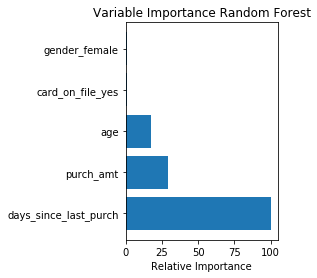

In [29]:
feature_importance = bestrfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()